# Two Sigma EDA

## Intro

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = (13.0, 6.0)

pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

with pd.HDFStore("../input/train.h5", "r") as train:
    df = train.get("train")

In [9]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,-0.179404,NaN,-0.072108,0.249187,0.024401,-0.127942,NaN,1.412742,-0.029575,1.265246,-0.055747,1.592256,-0.285275,-0.212888,0.404180,0.116903,0.197590,-0.197455,-0.195023,-0.059886,-0.021199,-0.013555,-0.236371,-0.253357,0.575562,0.283947,-0.006208,0.616351,-0.034578,0.732652,-0.002432,-0.092508,-0.072185,0.447296,-0.194318,0.264373,0.018763,NaN,-0.145278,-0.108547,0.148189,-0.226942,0.262864,-0.252933,-0.113265,0.180559,-0.033812,0.042951,-0.068031,0.208402,-0.082743,1.061059,1.120801,-0.228200,-0.119987,-0.131929,-0.145985,-0.155989,NaN,0.037680,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.273957,NaN,-2.0,-2.0,NaN,0.001652,-2.0,NaN,-2.0,NaN,0.652981,0.000000,-0.142453,0.0,NaN,NaN,1.427469,NaN,-2.0,0.0,NaN,NaN,NaN,0.0,0.937880,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,0.216281,0.09675,0.082042,-0.224383,-0.085529,0.024763,-0.062337,-0.202247,1.746692,-0.187505,-0.034664,-0.135177,0.305562,0.027595,-0.208746,0.118520,-0.123511,0.113818,NaN,-0.115837,0.028282,0.076565,-0.217346,0.100054,0.358808,0.057505,0.025719,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.126232,-0.131619,0.232268,-0.001455,-0.489863,0.017317,0.027321,0.334183,0.113513,0.111536,-0.179379,0.221287,-0.091886,NaN,0.107982,0.548687,-0.160079,-0.281368,0.063933,-0.235643,-0.205083,-0.194349,-0.365186,0.041928,-0.044907,-0.039079,-0.075000,-0.280418,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.159432,NaN,0.0,-2.0,NaN,0.004317,0.0,NaN,-2.0,NaN,-0.399520,0.000000,-0.309356,-0.5,NaN,NaN,0.154613,NaN,0.0,0.0,NaN,NaN,NaN,0.5,0.232154,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,NaN,NaN,-0.051418,-0.258330,-0.122140,-0.121041,-0.058287,-0.899515,-0.022131,-0.079002,-0.031116,-0.100603,-0.341474,-0.007522,0.077977,-0.149581,0.036946,0.166182,NaN,0.172751,0.961091,1.028205,-0.165369,0.056006,NaN,0.249530,-0.156078,NaN,0.019192,0.053364,-0.020247,NaN,0.064028,-0.249106,-0.106216,-0.085509,0.383589,NaN,-0.074021,-0.054295,-0.746073,-0.057605,-0.126238,0.462523,0.060902,NaN,-0.262892,-0.059395,0.562975,-0.026392,0.013430,-0.627150,-0.470362,-0.101865,0.436794,-0.057049,-0.120851,-0.061941,-0.600019,0.138357,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.227811,NaN,-2.0,-2.0,NaN,0.000000,-2.0,NaN,-2.0,NaN,-0.496284,0.006942,0.122841,-0.5,NaN,NaN,0.378332,NaN,-2.0,

In [4]:
len(df)

1710756

In [34]:
len(df['timestamp'].unique())

1813

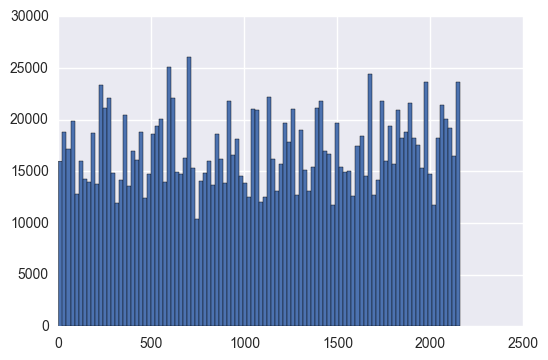

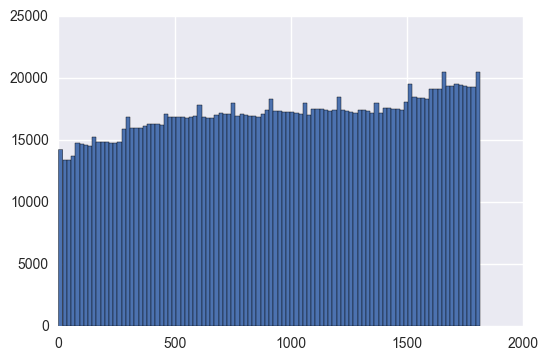

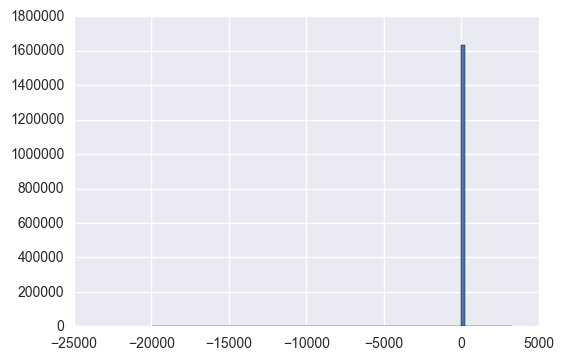

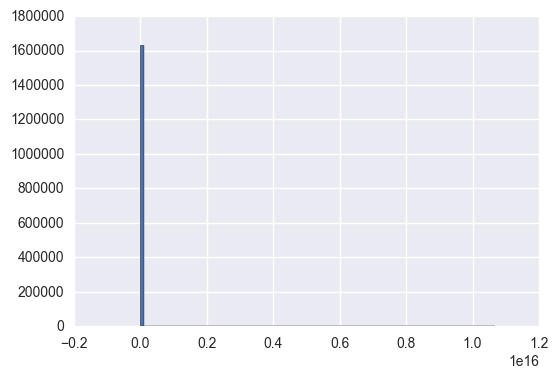

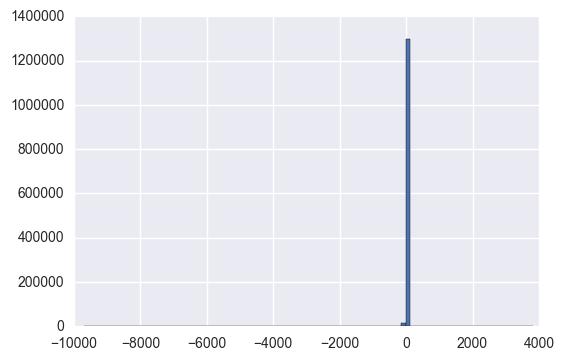

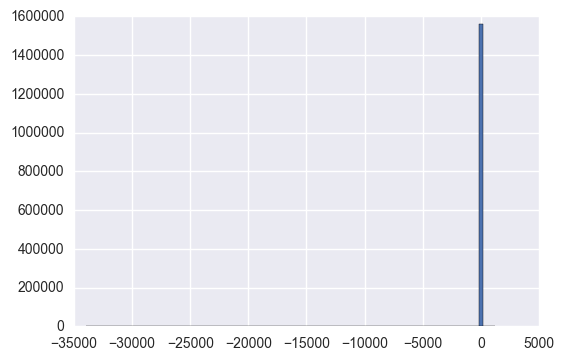

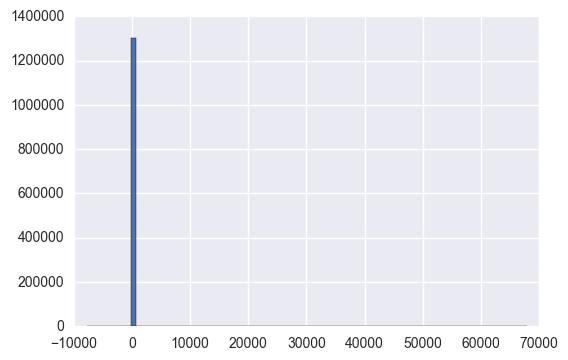

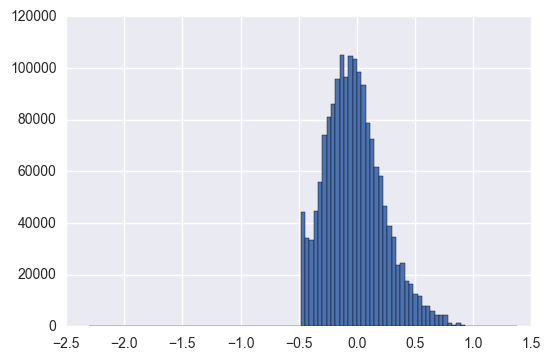

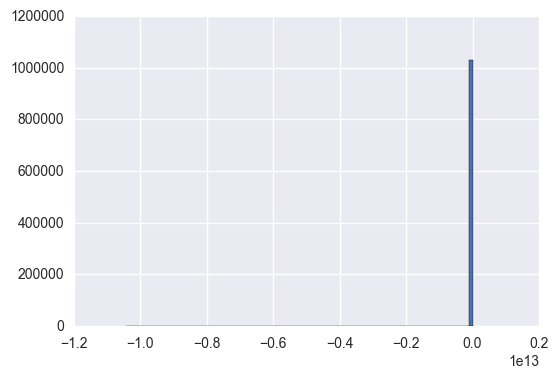

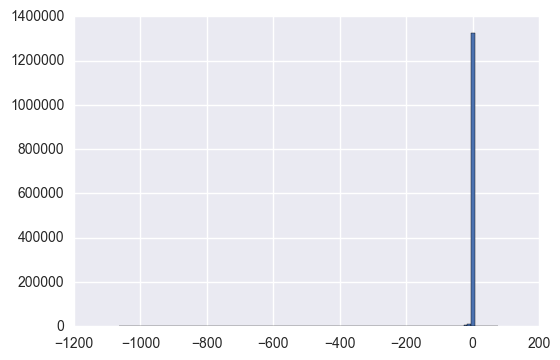

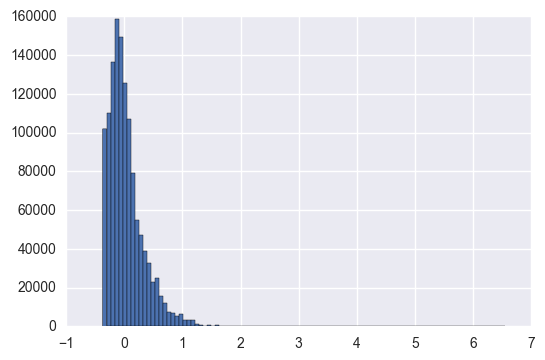

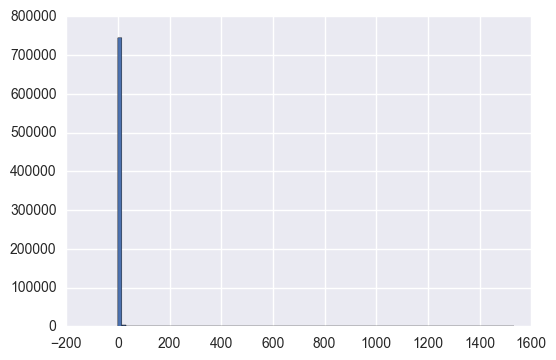

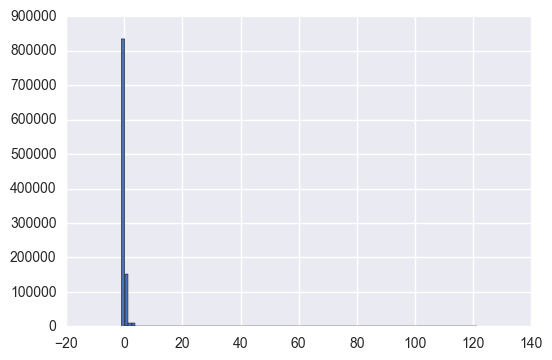

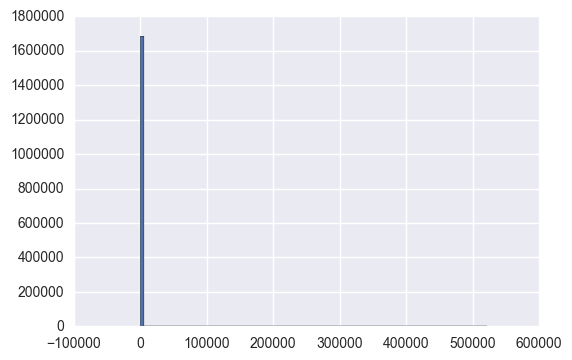

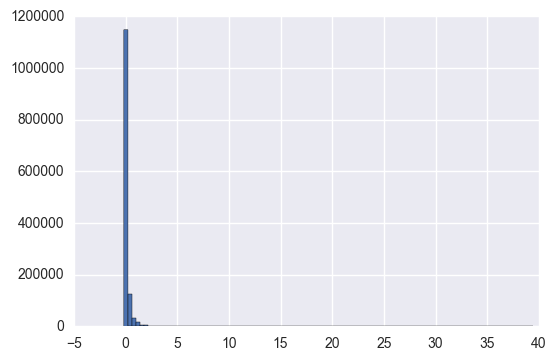

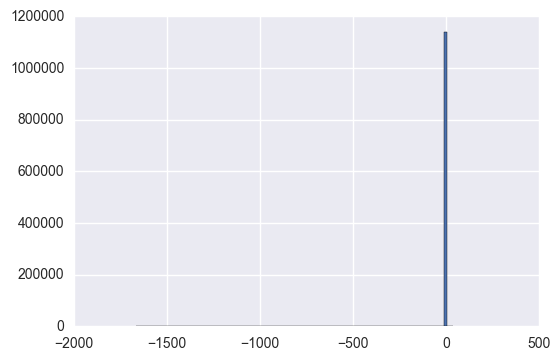

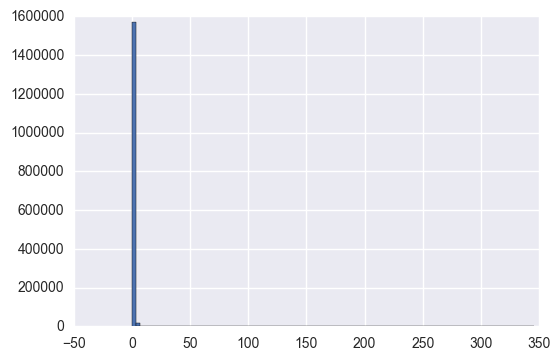

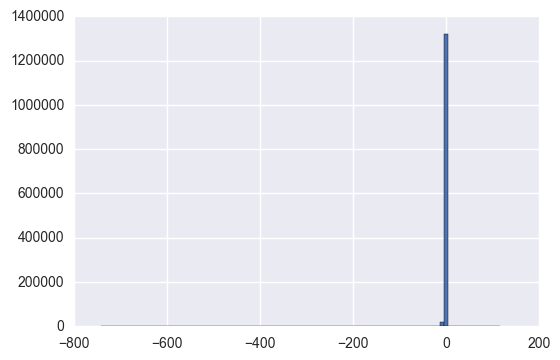

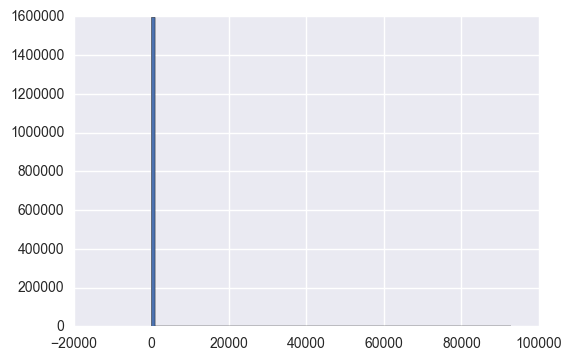

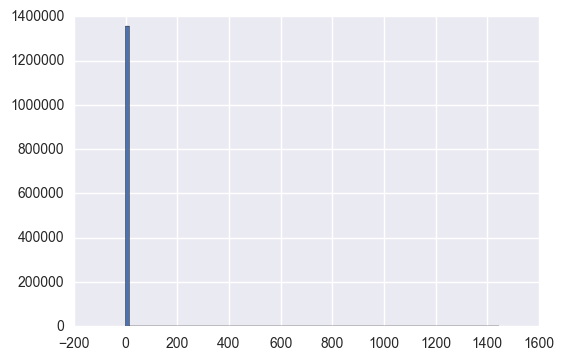

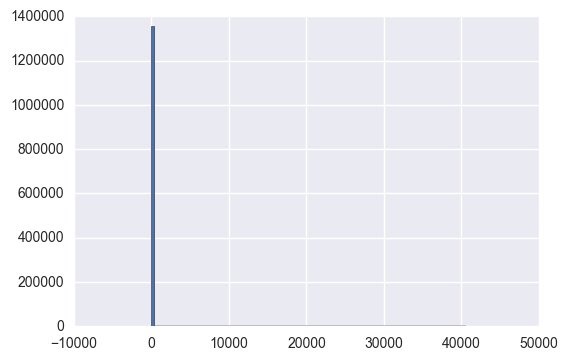

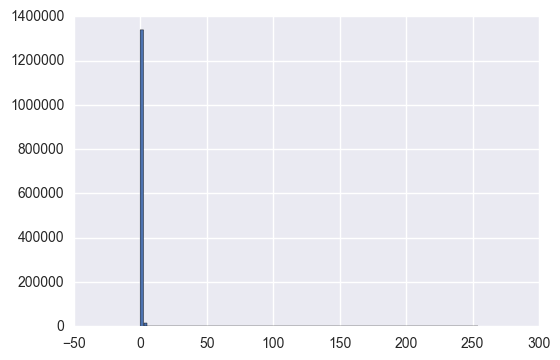

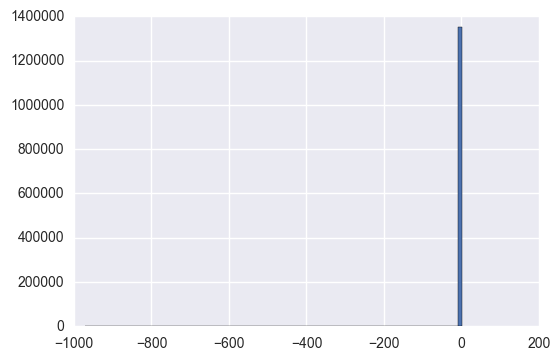

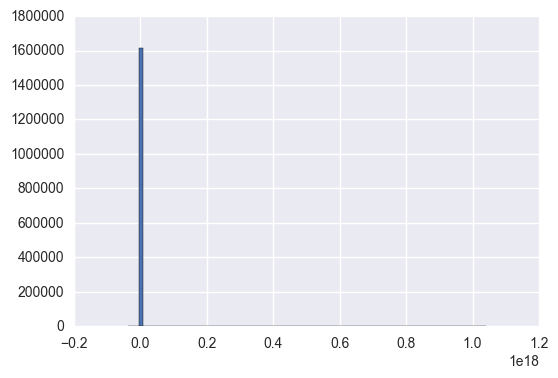

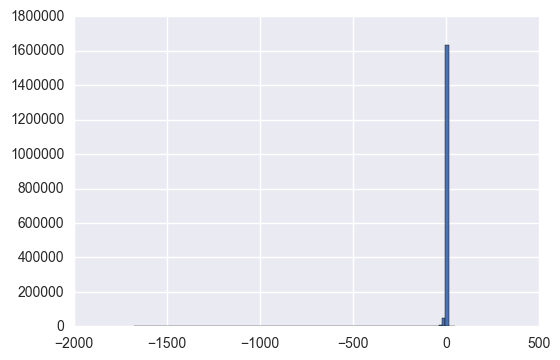

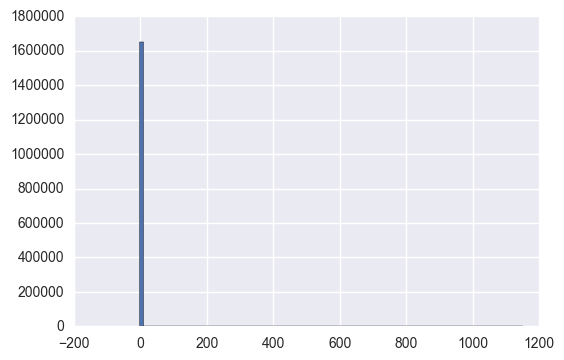

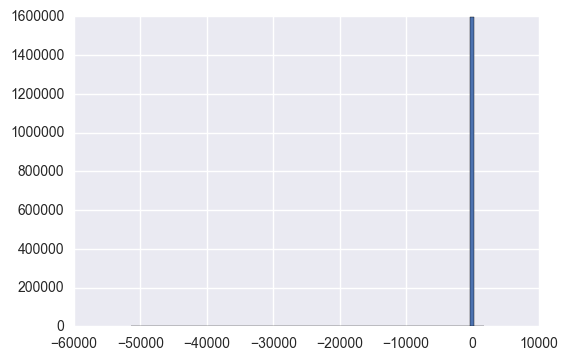

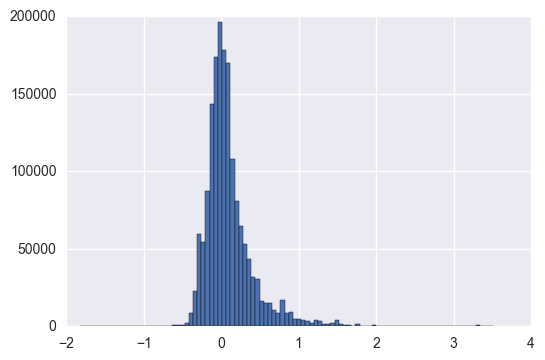

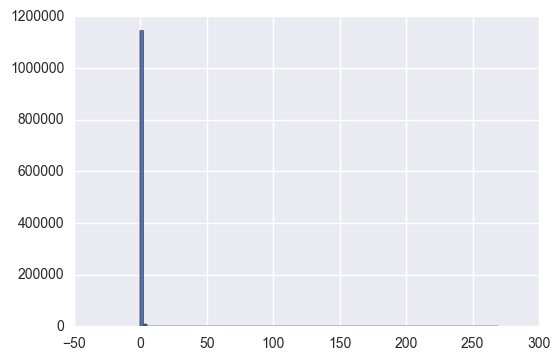

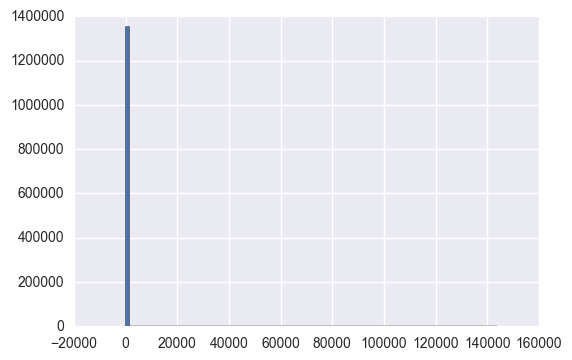

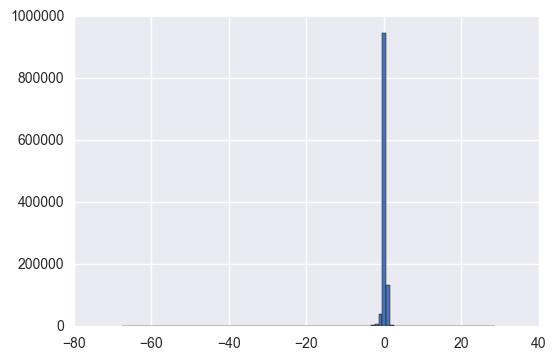

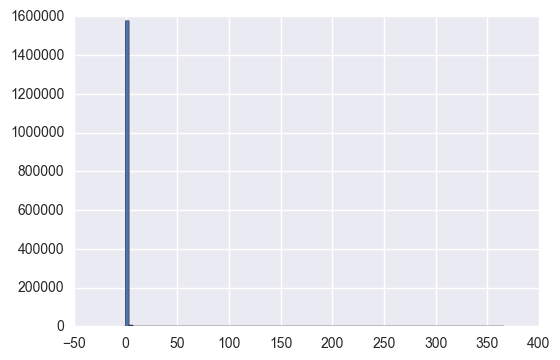

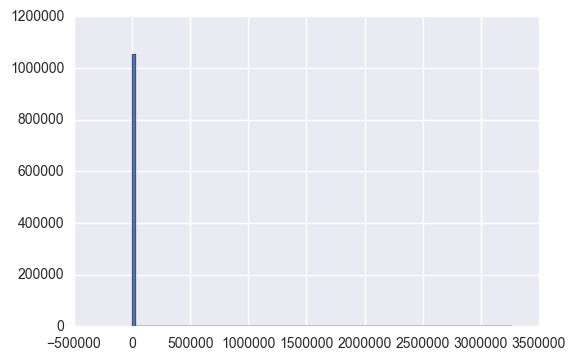

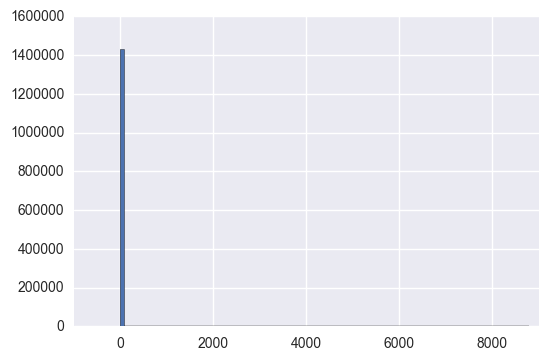

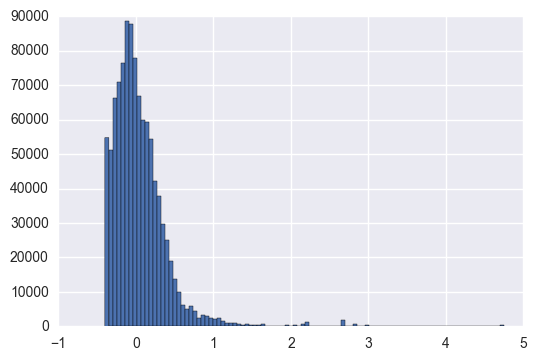

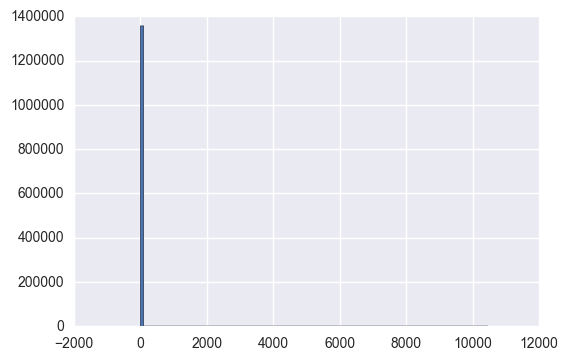

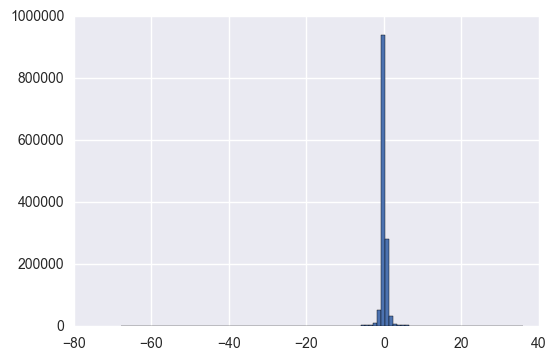

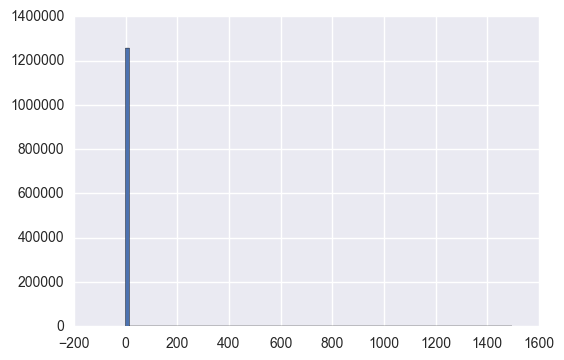

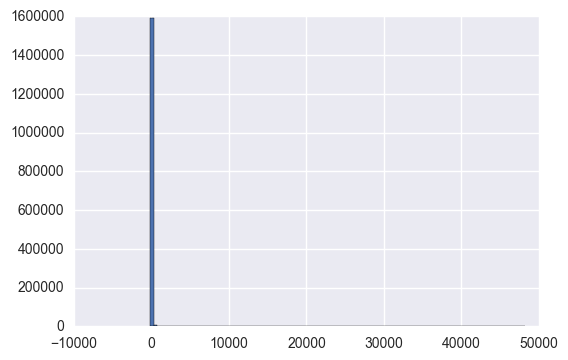

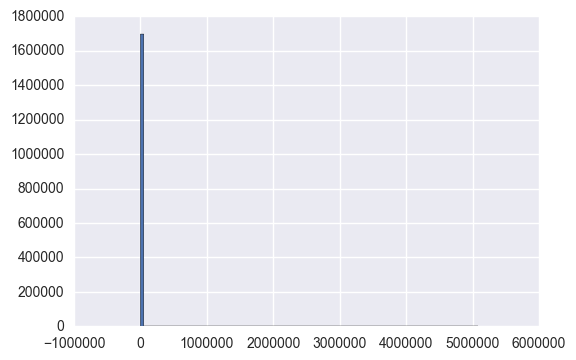

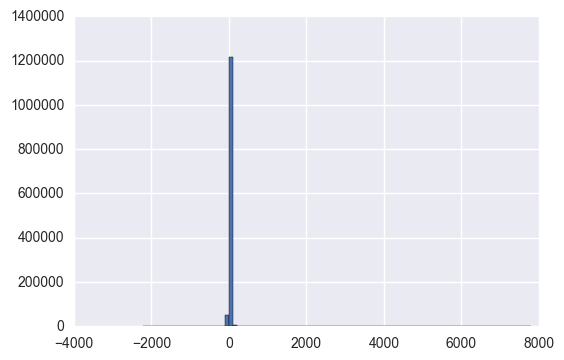

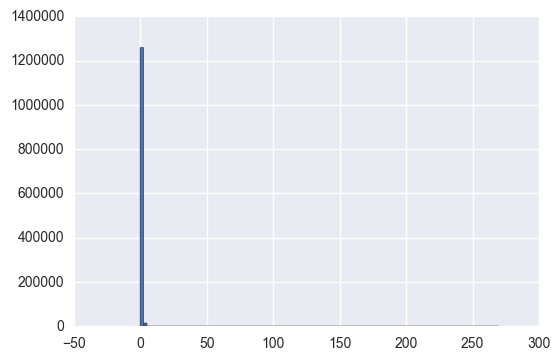

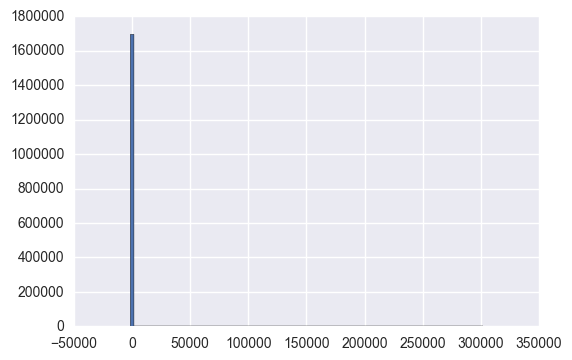

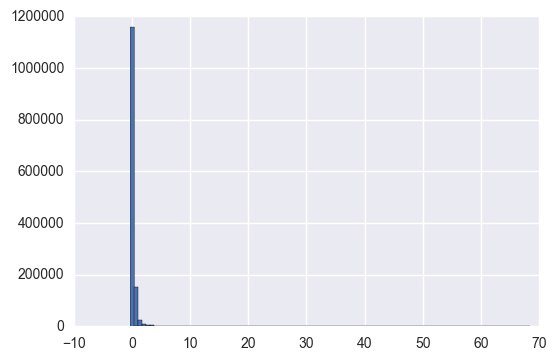

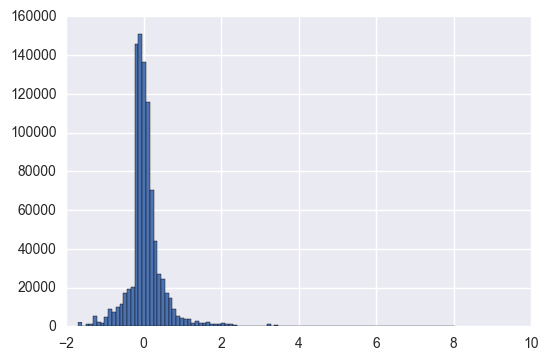

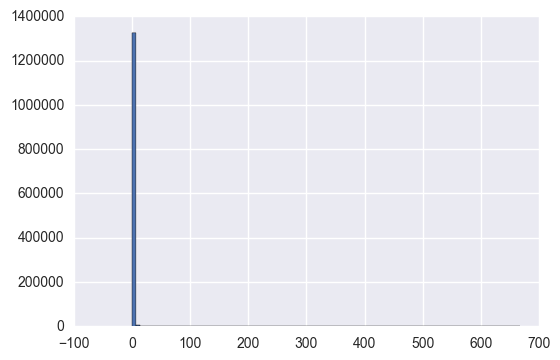

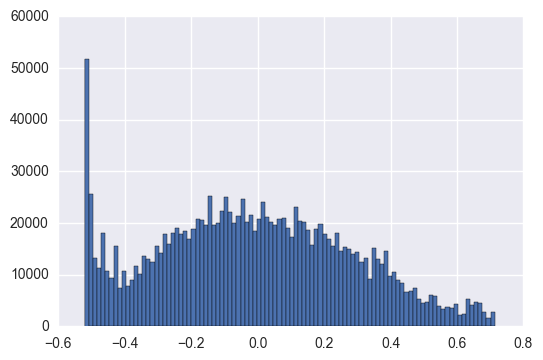

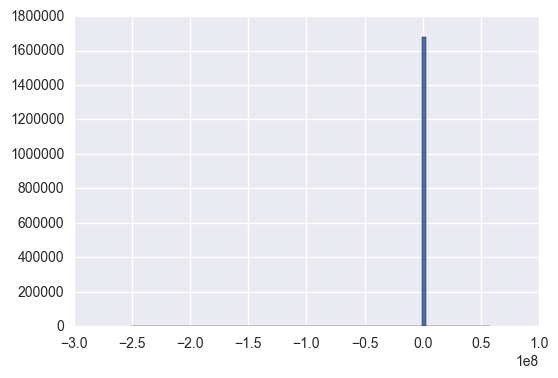

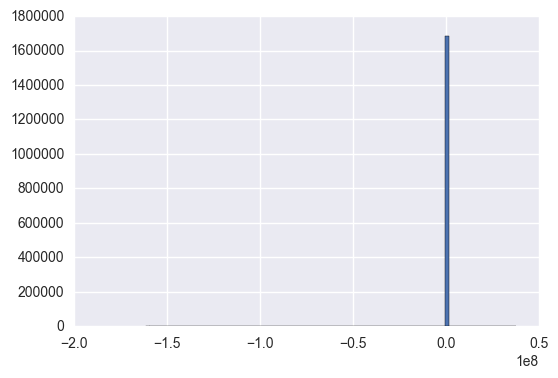

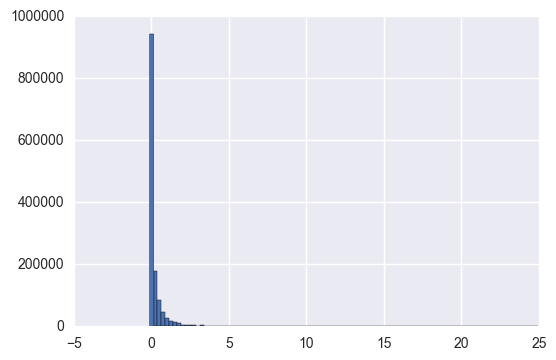

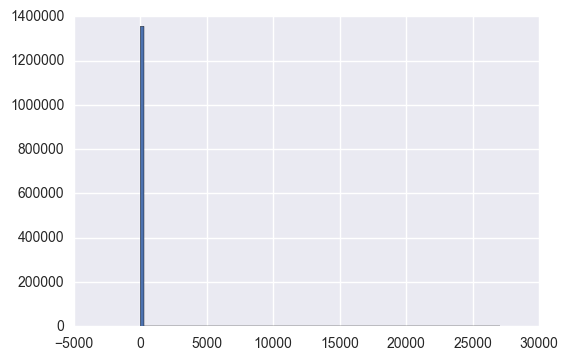

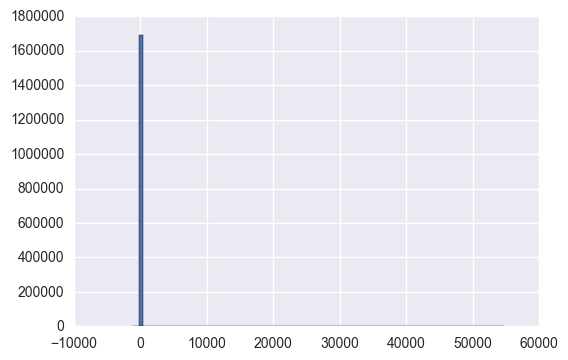

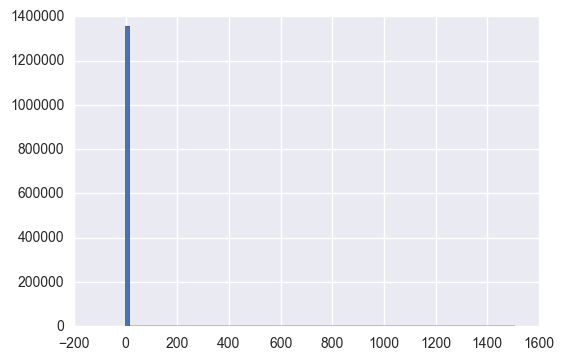

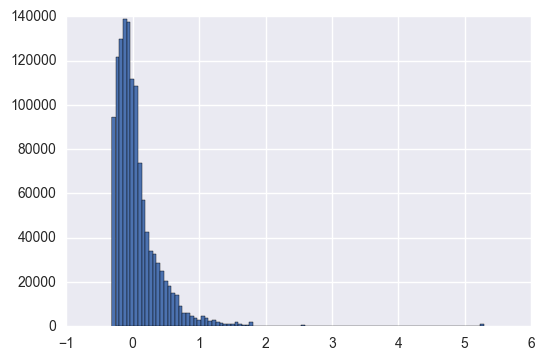

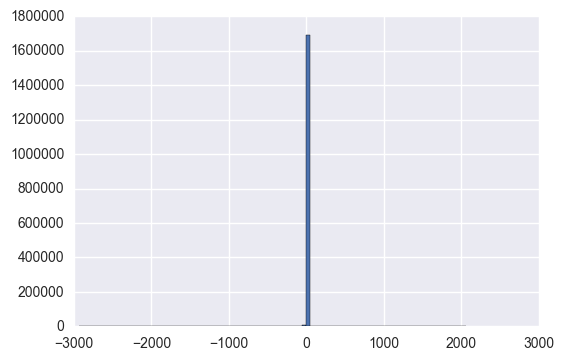

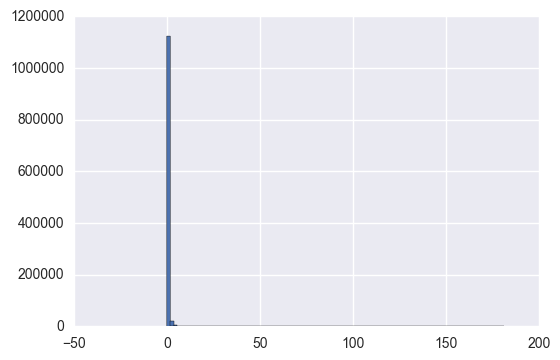

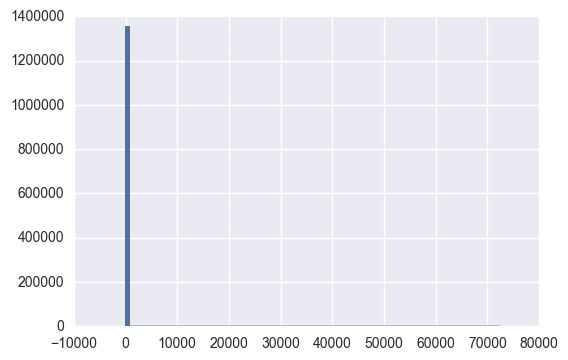

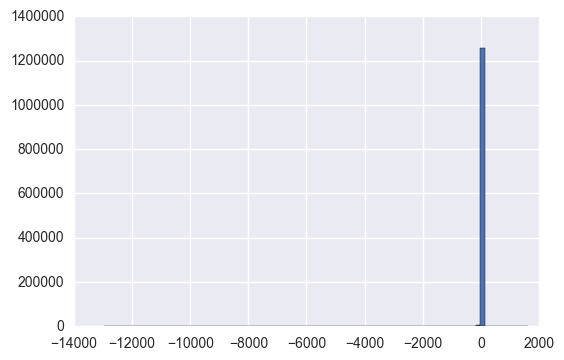

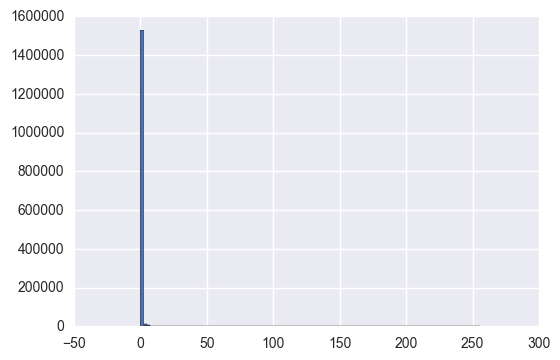

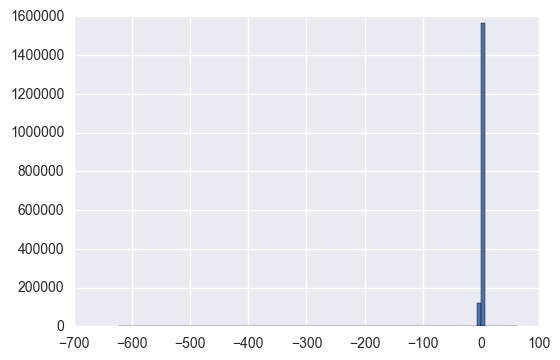

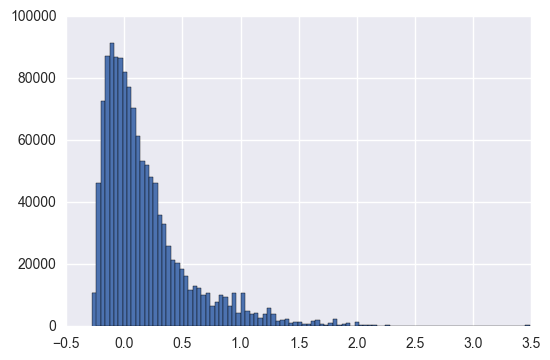

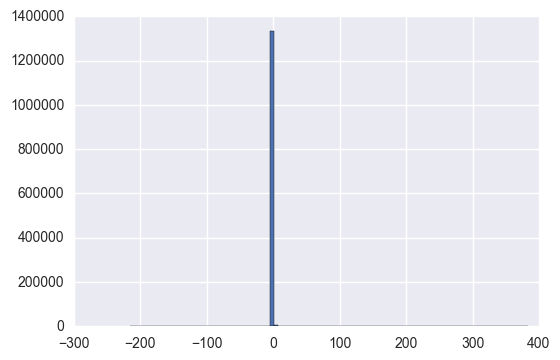

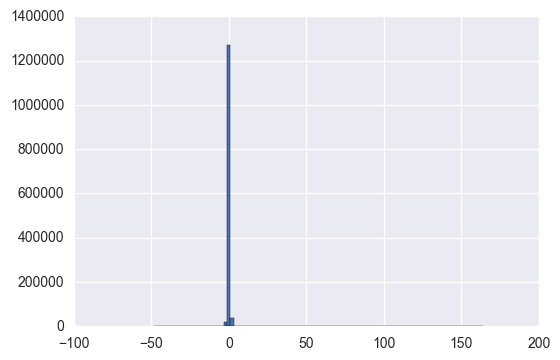

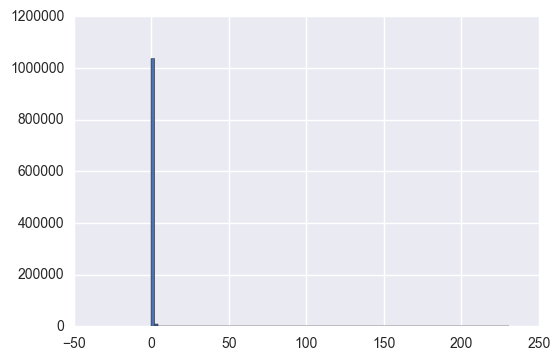

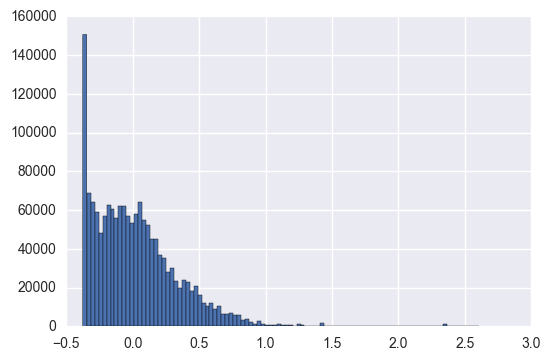

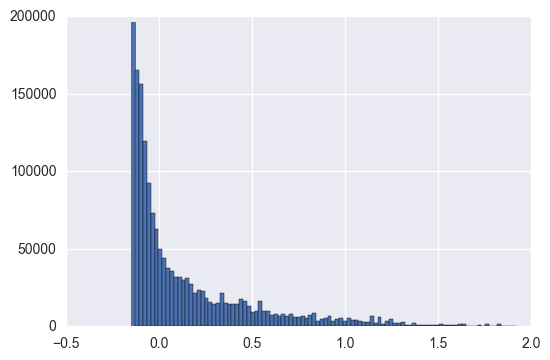

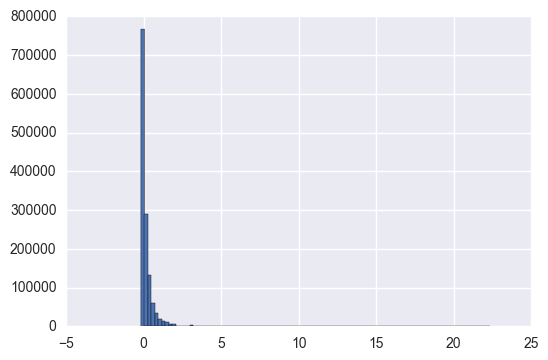

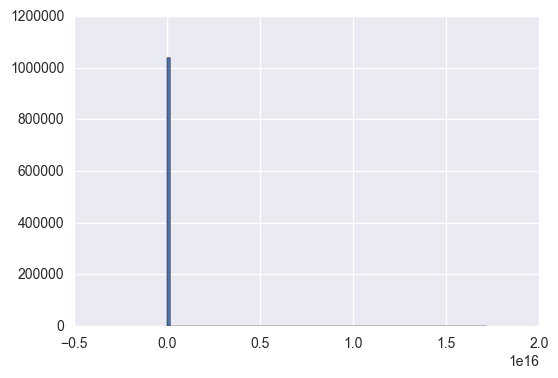

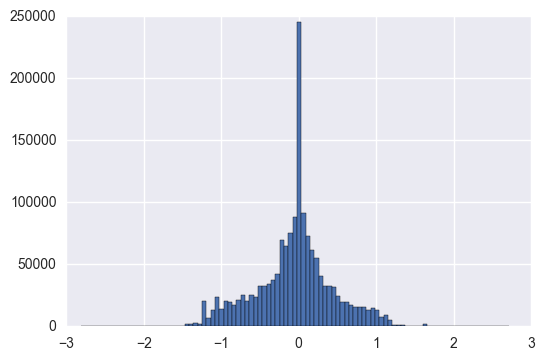

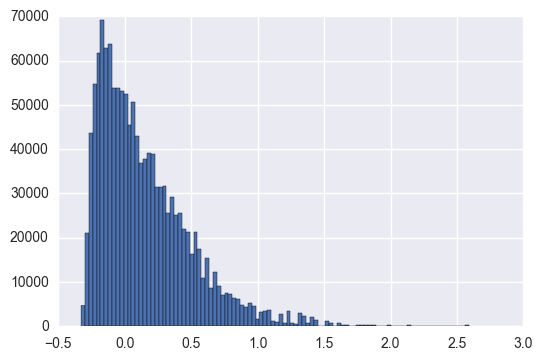

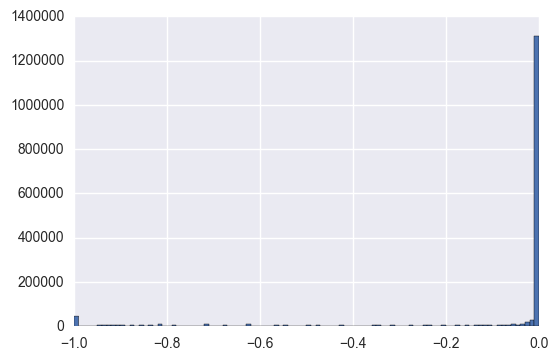

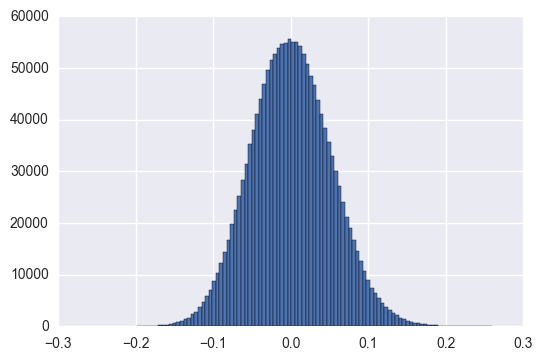

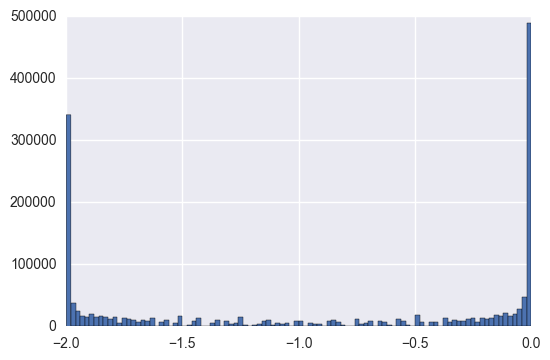

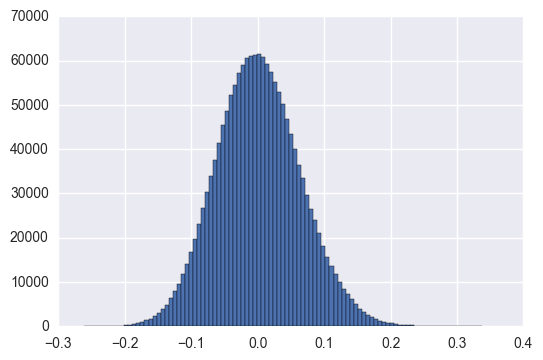

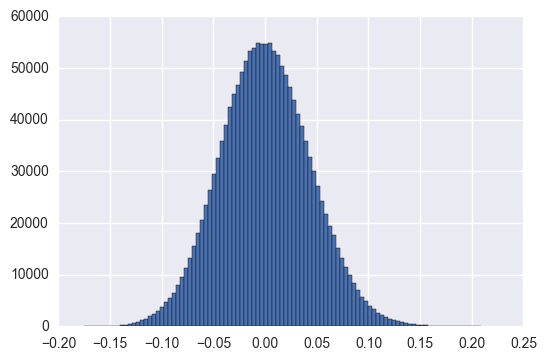

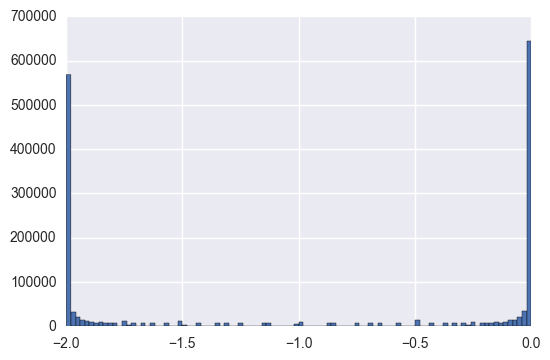

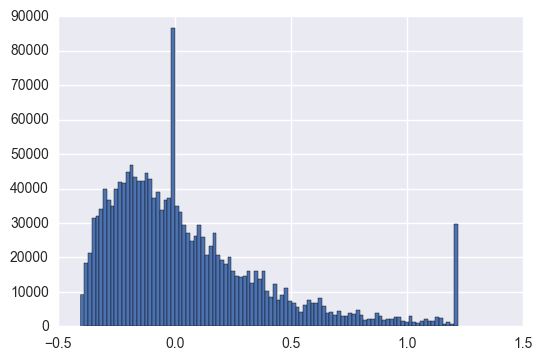

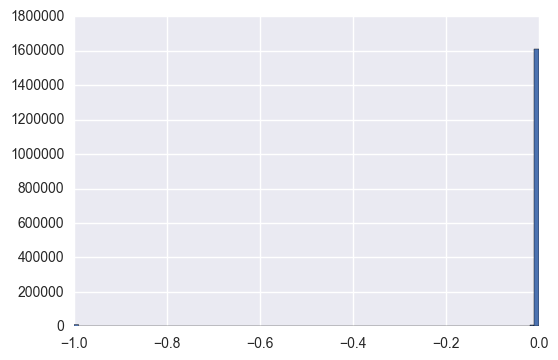

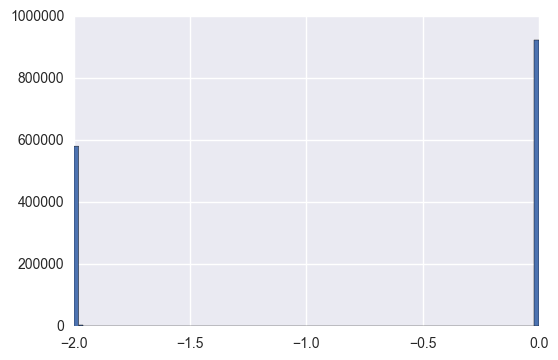

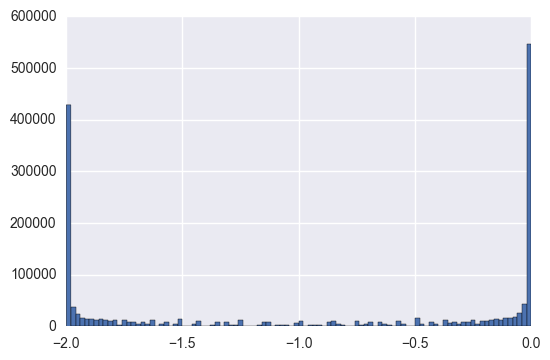

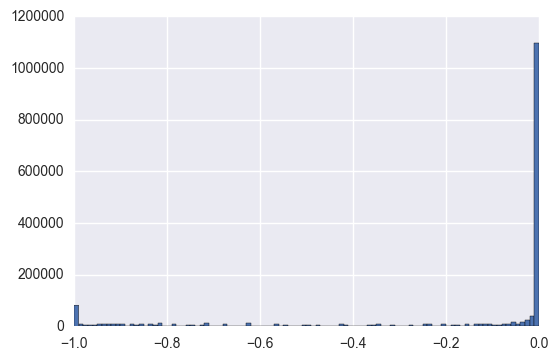

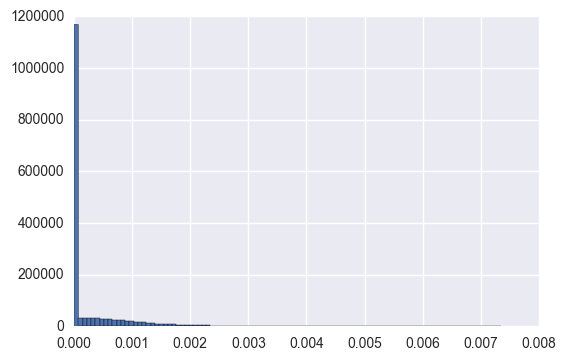

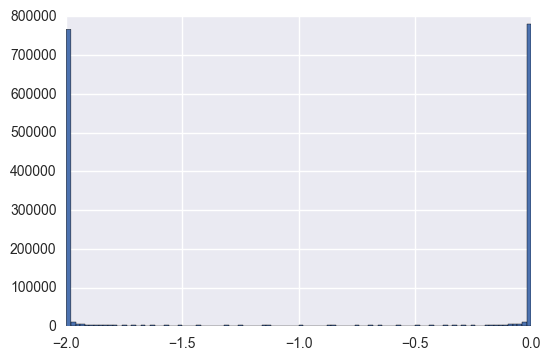

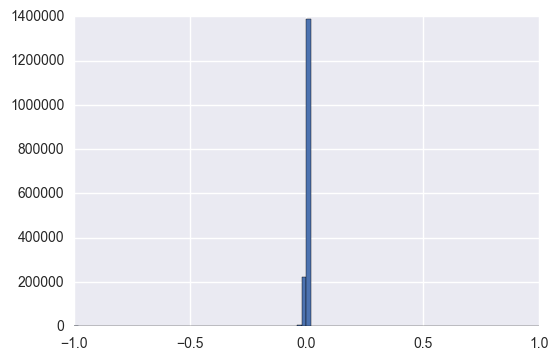

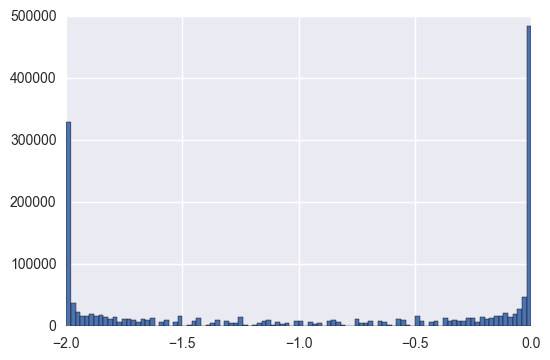

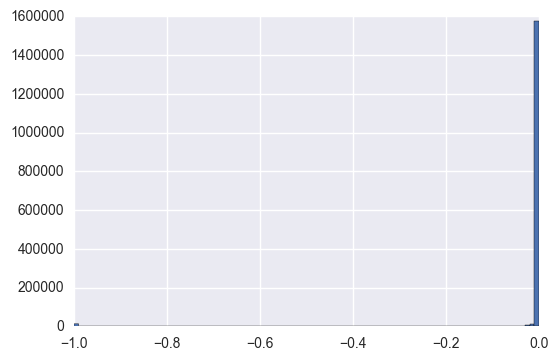

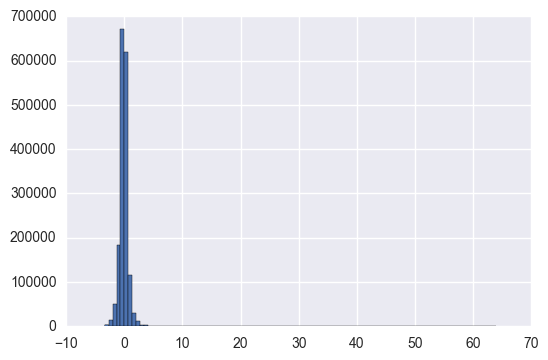

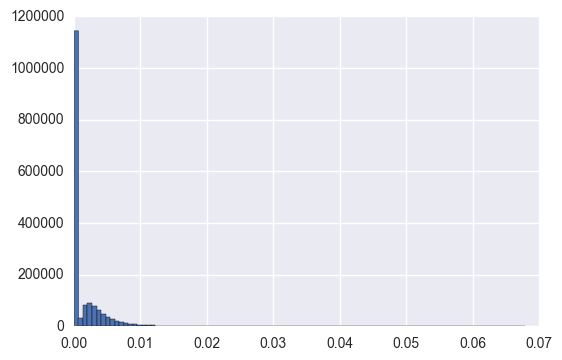

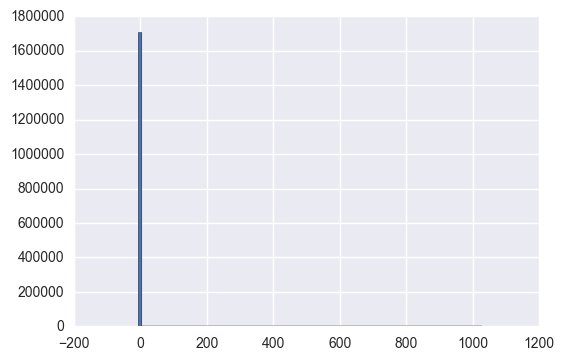

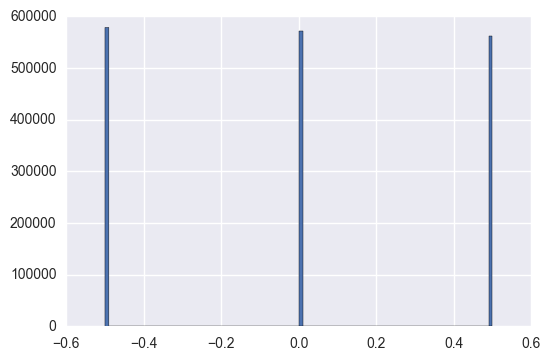

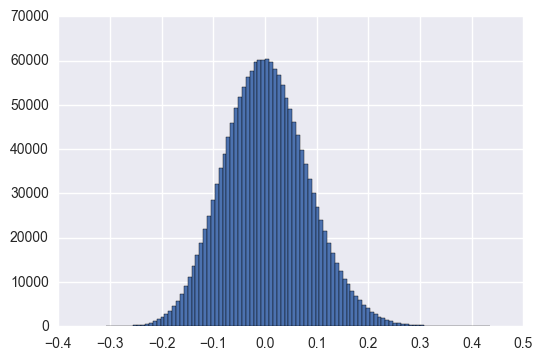

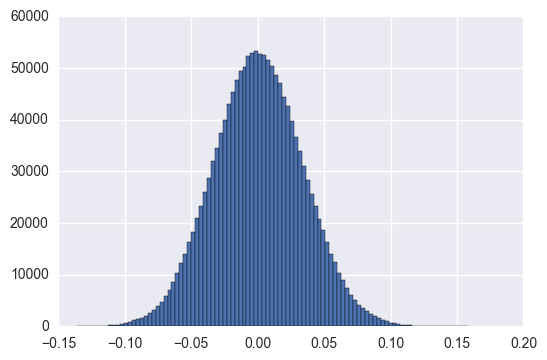

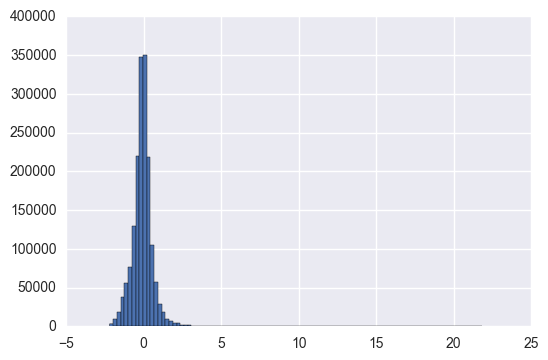

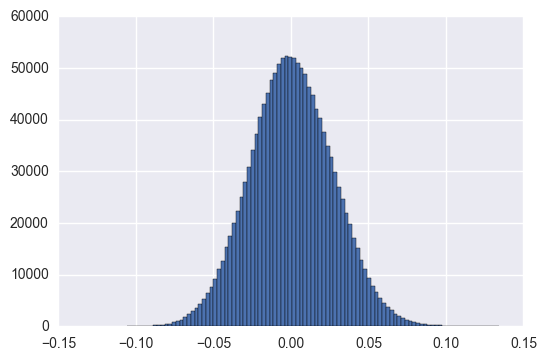

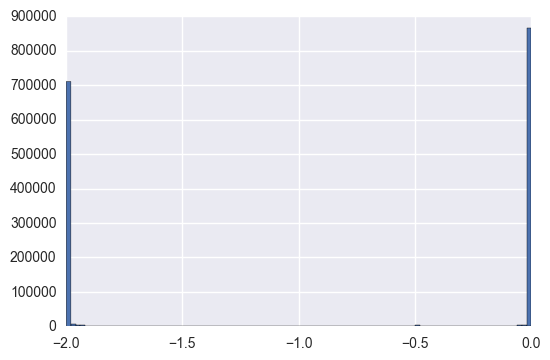

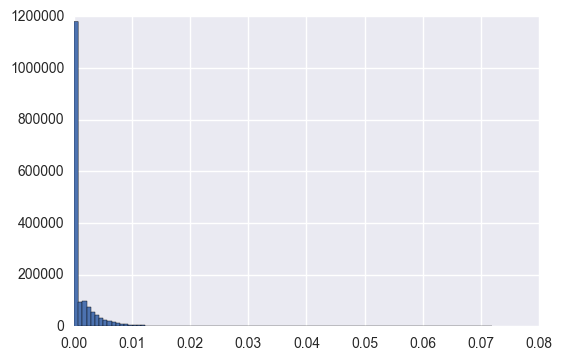

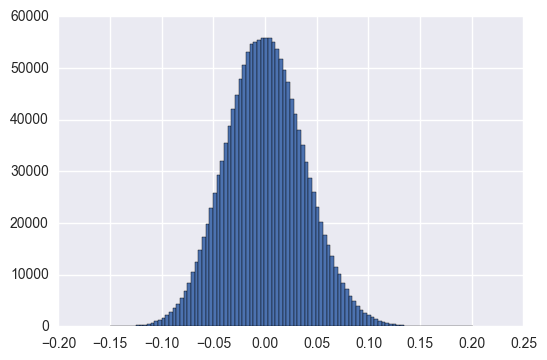

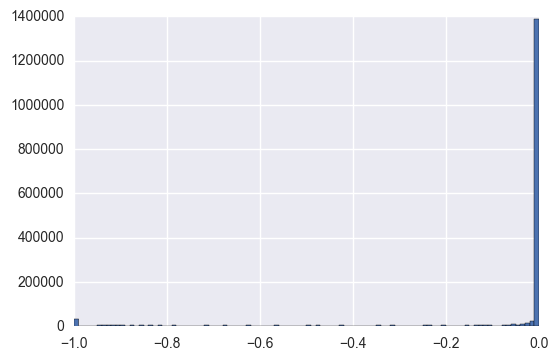

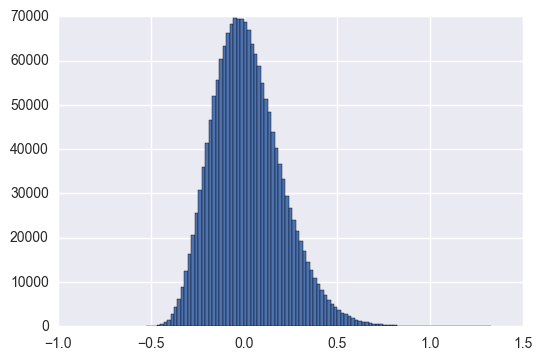

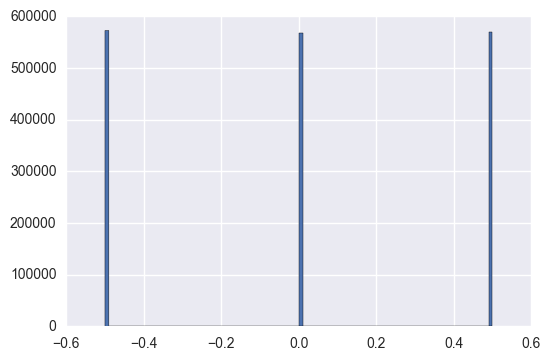

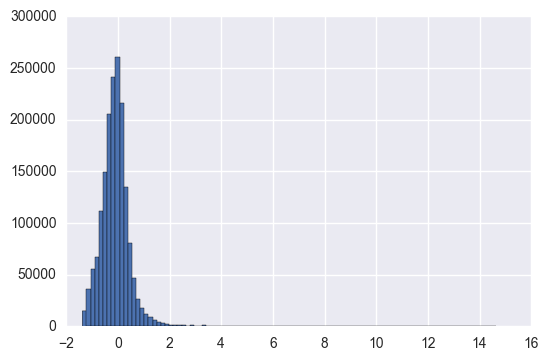

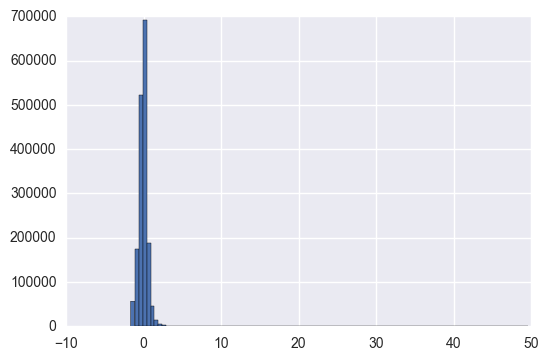

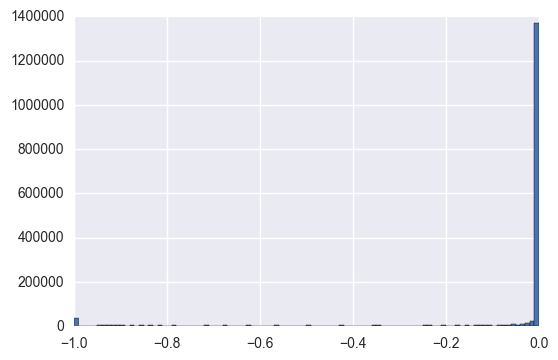

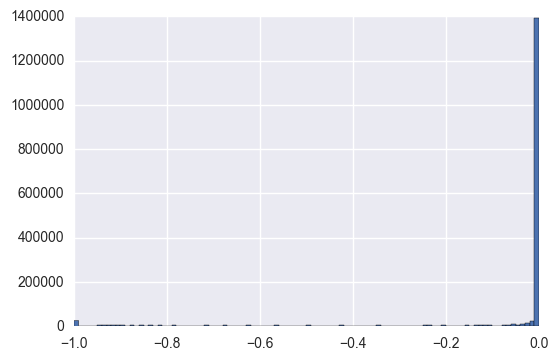

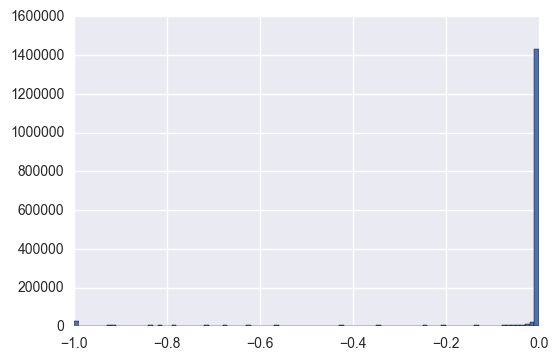

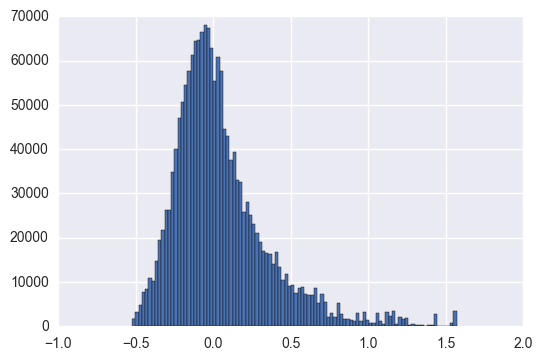

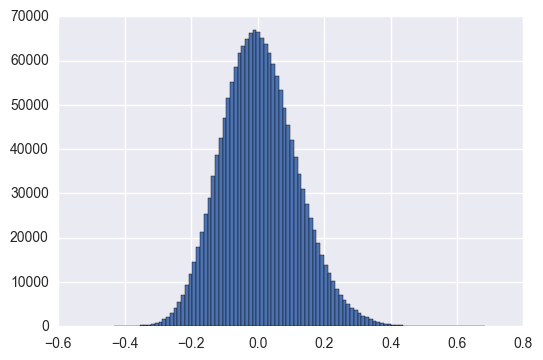

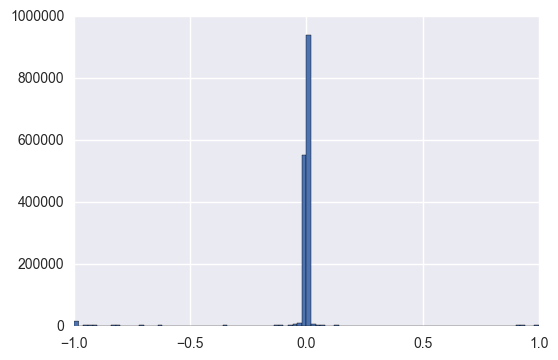

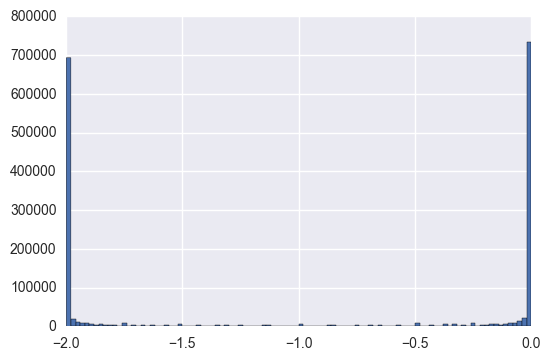

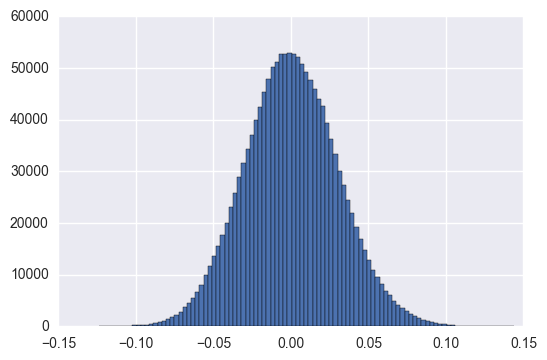

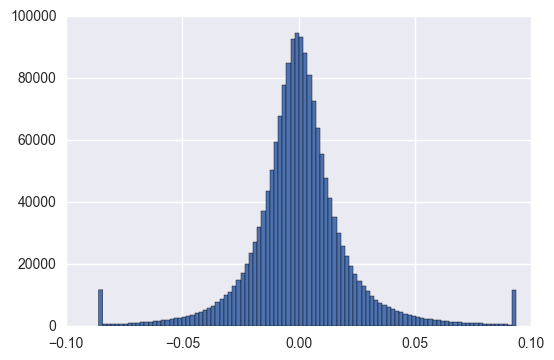

In [66]:
for col in df.columns:
    plt.hist(df[col].dropna(), bins = 100)
    plt.show()

In [61]:
df.apply(lambda x: len(x.unique()))

id                   1424
timestamp            1813
derived_0         1389979
derived_1         1374902
derived_2         1087825
derived_3         1343906
derived_4         1090237
fundamental_0     1415381
fundamental_1      832661
fundamental_2     1122858
fundamental_3      956076
fundamental_5      557702
fundamental_6      592517
fundamental_7     1416031
fundamental_8     1078487
fundamental_9      996591
fundamental_10    1238218
fundamental_11    1122983
fundamental_12    1268141
fundamental_13    1096324
fundamental_14    1097251
fundamental_15    1130115
fundamental_16    1091314
fundamental_17    1256799
fundamental_18    1443024
fundamental_19     583342
fundamental_20    1320095
fundamental_21    1162853
fundamental_22     915645
fundamental_23    1112789
fundamental_24     988104
fundamental_25    1203231
fundamental_26     934182
fundamental_27    1025973
fundamental_28     708334
fundamental_29    1115078
fundamental_30    1134537
fundamental_31     958102
fundamental_

## y

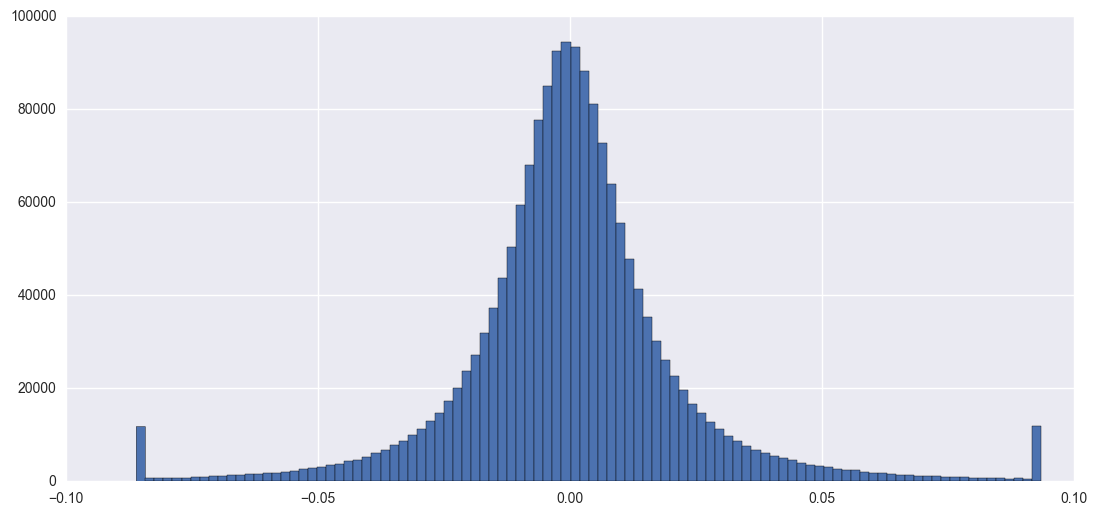

In [76]:
y_hist = plt.hist(df['y'], bins = 100)

In [28]:
max(df['y'])

0.093497805

In [30]:
len(df[df['y'] == max(df['y'])])

11286

In [31]:
min(df['y'])

-0.086094126

In [32]:
len(df[df['y'] == min(df['y'])])

11173

Values outside max and min are capped.

## id

In [35]:
len(df['id'].unique())

1424

## timestamp

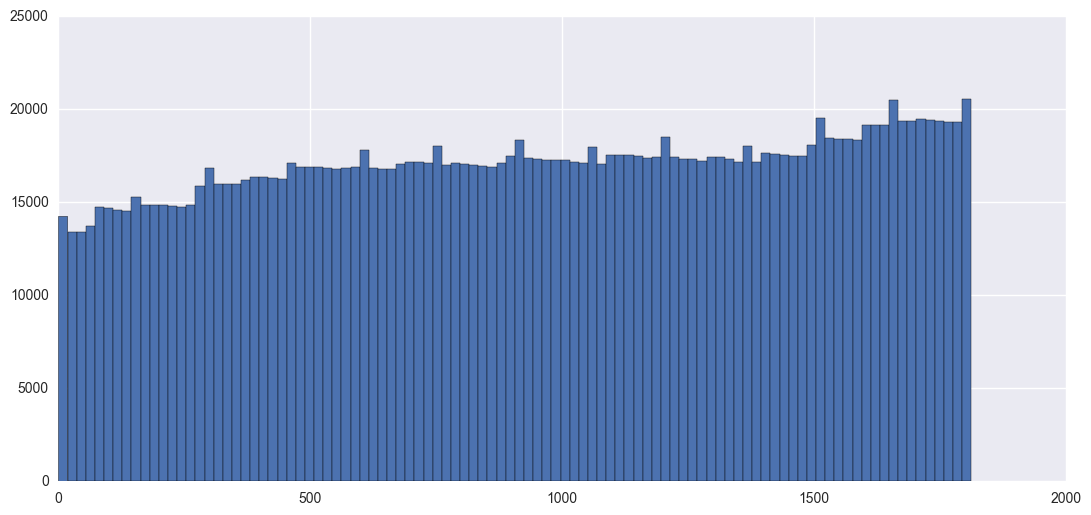

In [75]:
timestamp_hist = plt.hist(df['timestamp'], bins = 100)

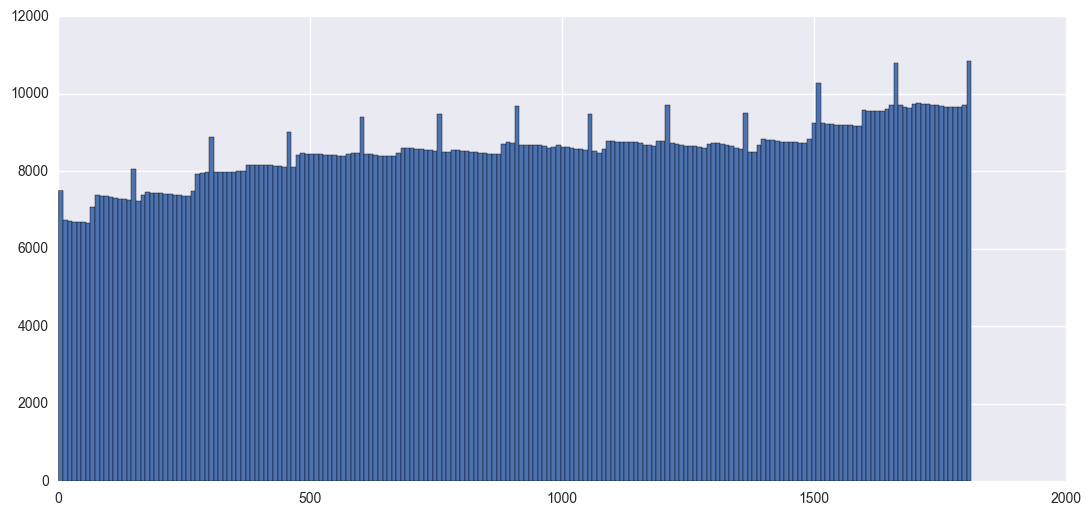

In [74]:
timestamp_hist = plt.hist(df['timestamp'], bins = 200)

## id 10

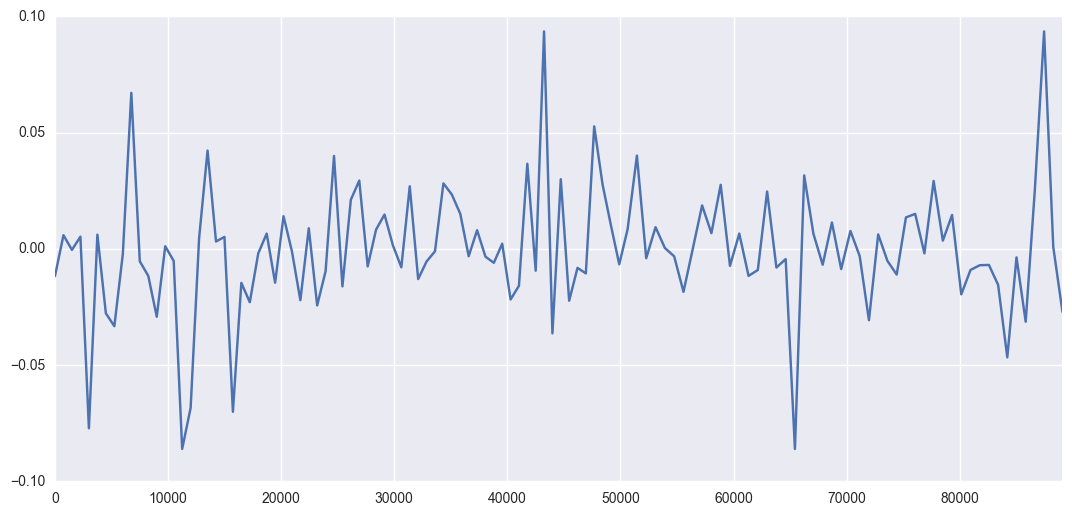

In [79]:
df_10 = df[df['id'] == 10]

df_10['y'].plot()

In [80]:
df_10['cumprod_1py'] = (df_10['y'] + 1).cumprod()

/Users/schiller/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


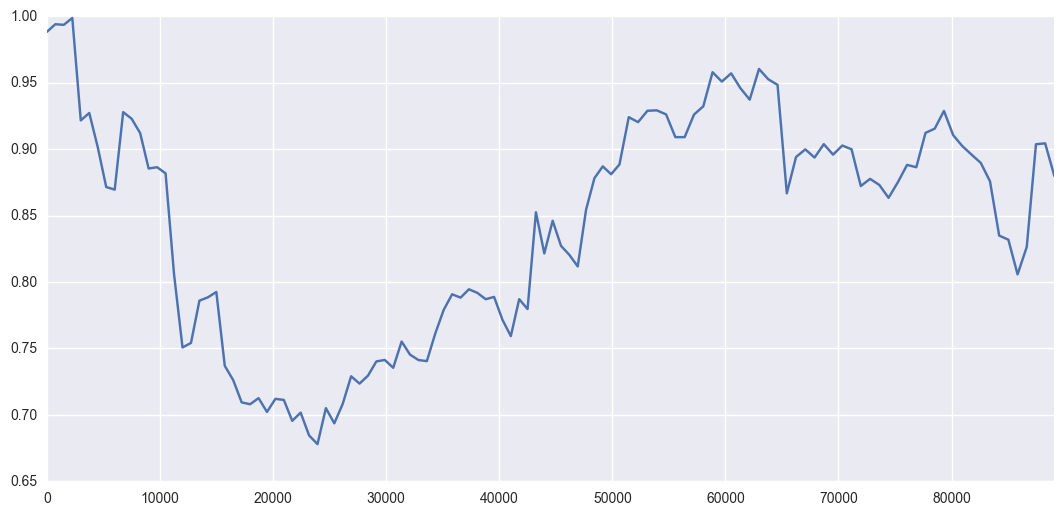

In [82]:
df_10['cumprod_1py'].plot()

In [15]:
n_timestamps = len(df['timestamp'].unique())